#Titanic Survival Prediction

In this project, we use the Titanic dataset to predict whether a passenger survived or not. We apply a Decision Tree Classifier from Scikit-learn to model survival.

**Steps**:
- Handle missing values
- Encode categorical features
- Split data into training/testing sets
- Train and evaluate Decision Tree model

***Goal***: Predict survival with interpretable rules and measure accuracy on real data.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing

In [ ]:
df= pd.read_csv('Titanic Decision Tree Classifier.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.shape #(rows,columns)

(418, 12)

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df.info()
#age,,fare,cabin have nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
 12  FamilySize   418 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 42.6+ KB


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df.isnull().sum()/df.shape[0]*100
#null values/num of rows(first element in df.shape) = percentage of null values

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234


In [ ]:
df.duplicated().sum()
#no duplicates

np.int64(0)

#EDA

In [ ]:
df.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Peter, Master. Michael J",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


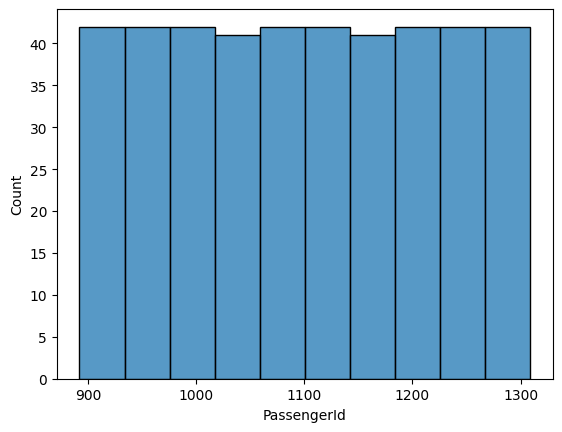

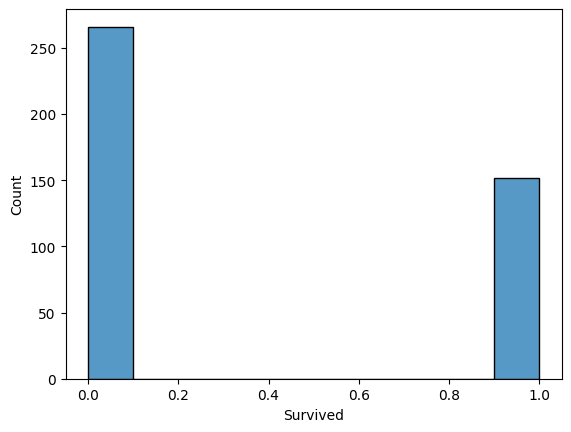

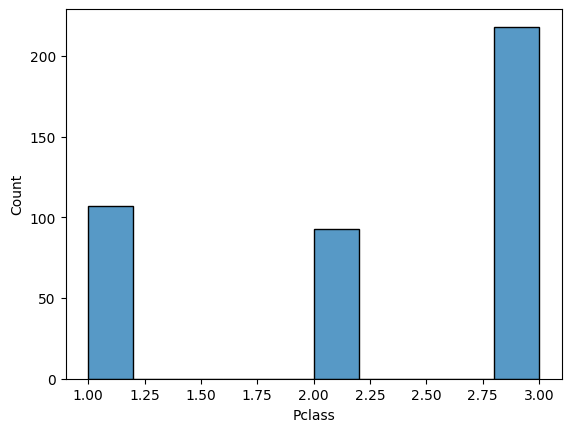

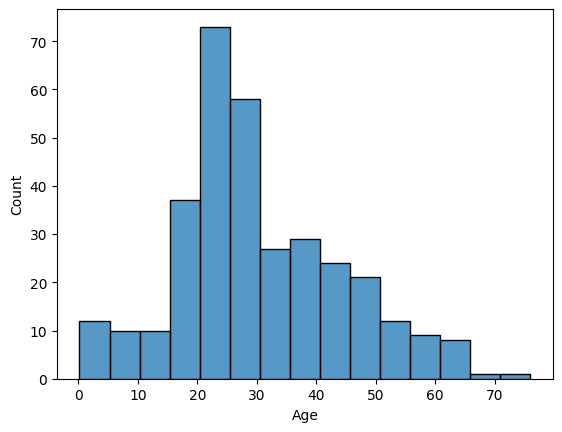

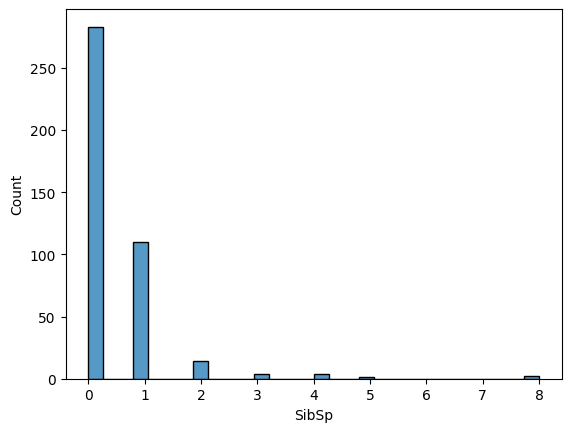

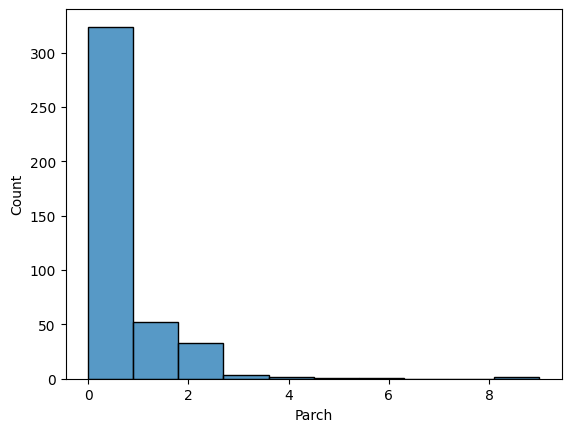

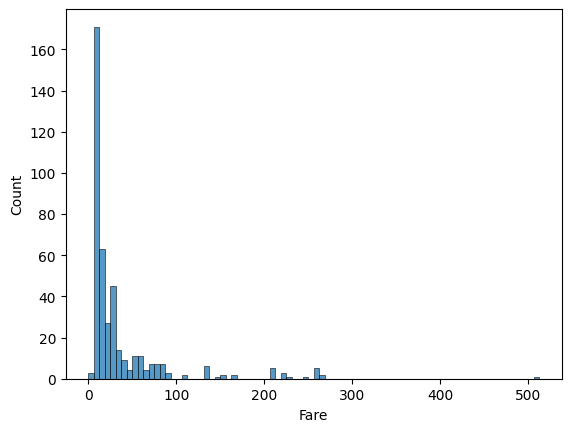

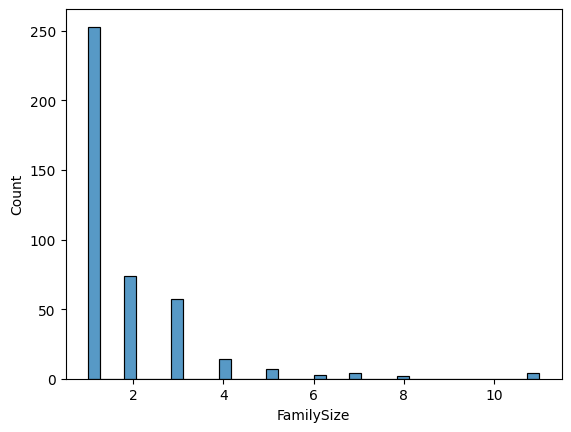

In [ ]:
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

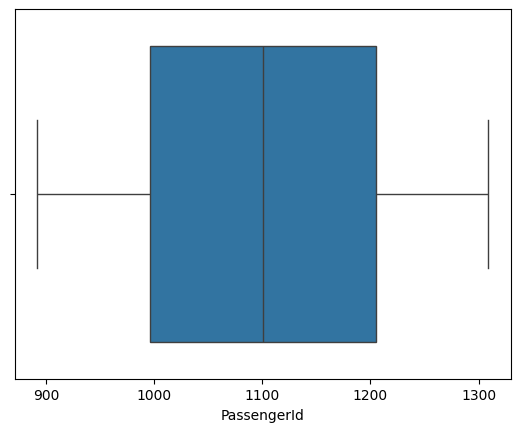

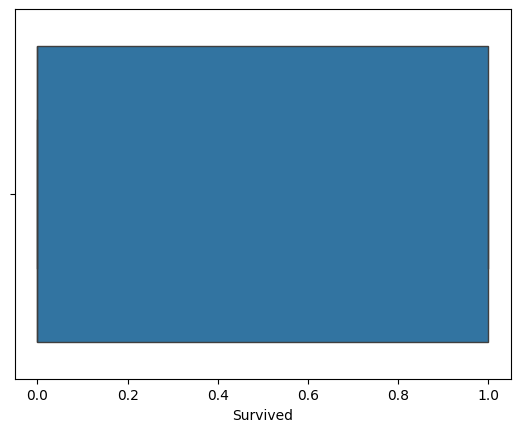

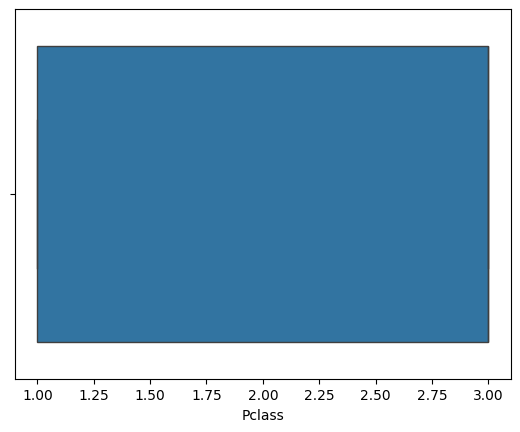

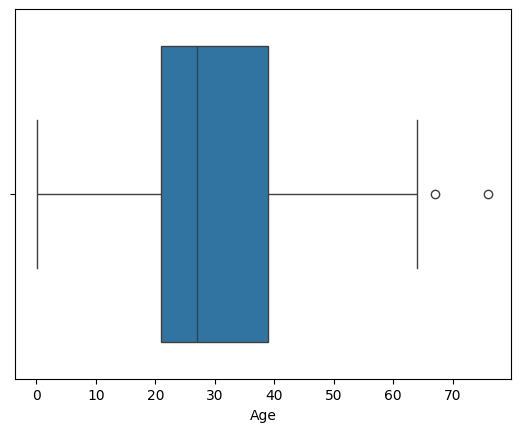

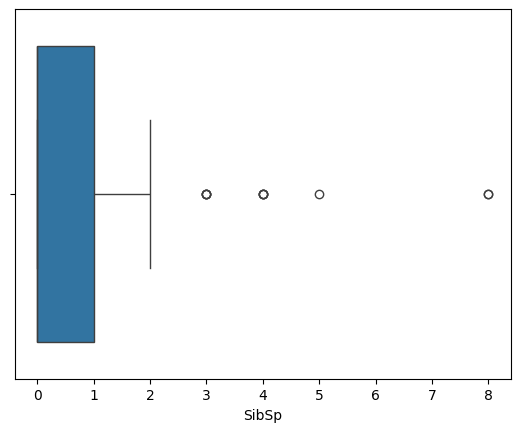

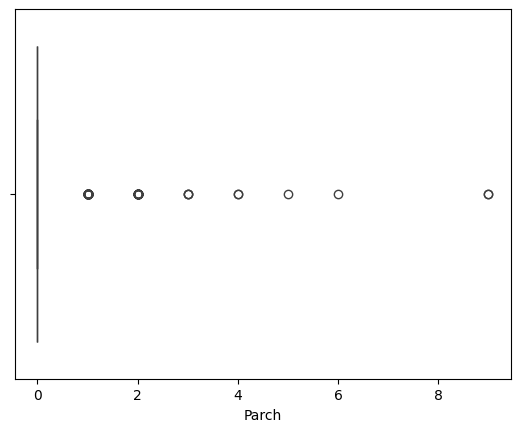

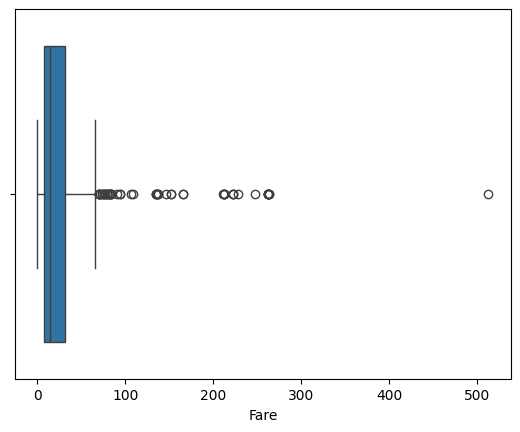

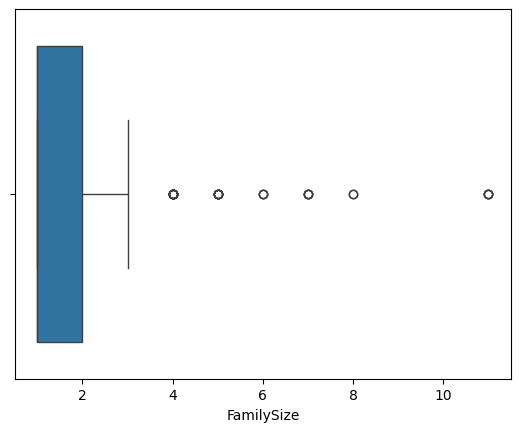

In [ ]:
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df, x=i)
  plt.show()

In [ ]:
df.select_dtypes(include="number").columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize'],
      dtype='object')

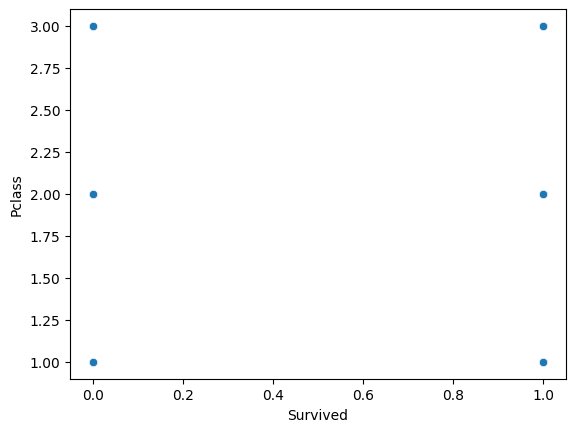

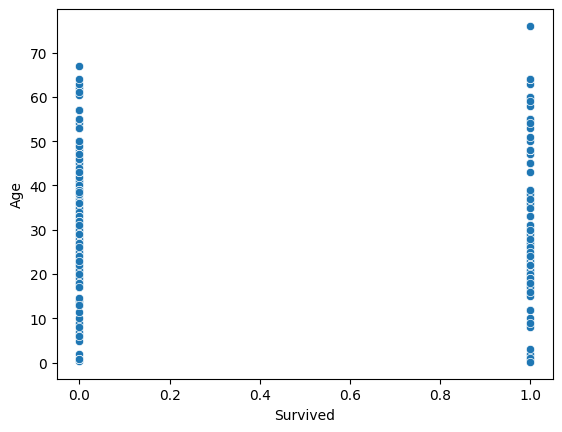

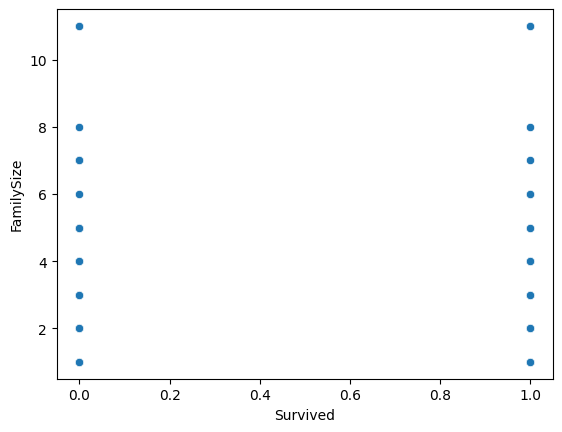

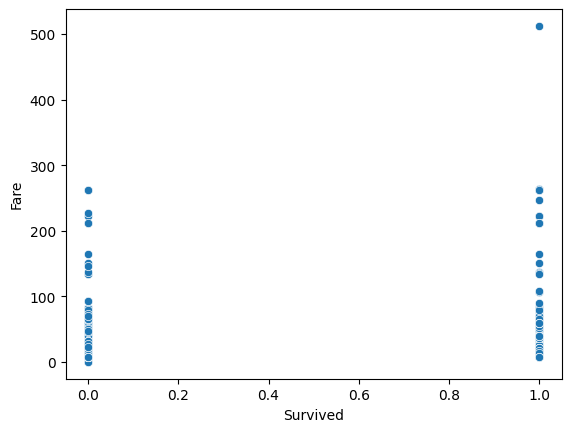

In [ ]:
for i in ['Pclass', 'Age', 'FamilySize', 'Fare']:
  sns.scatterplot(data=df, x='Survived', y=i)
  plt.show()

<Axes: >

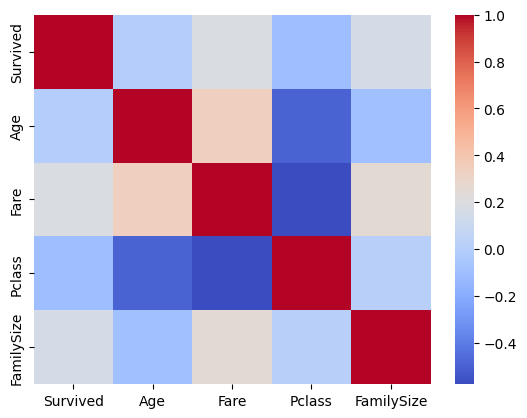

In [ ]:
cols = ['Survived', 'Age', 'Fare', 'Pclass', 'FamilySize']
s= df[cols].corr()
sns.heatmap(s, cmap='coolwarm')

# Cleaning

In [ ]:
from sklearn.impute import KNNImputer
impute= KNNImputer()

In [ ]:
for i in df.select_dtypes(include="number").columns:
  df[i]=impute.fit_transform(df[[i]])

In [ ]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return lower_bound,upper_bound

In [ ]:
for i in ['Fare','Age']:
  lower_bound,upper_bound=wisker(df[i])
  df[i]=np.where(df[i]<lower_bound,lower_bound,df[i])
  df[i]=np.where(df[i]>upper_bound,upper_bound,df[i])

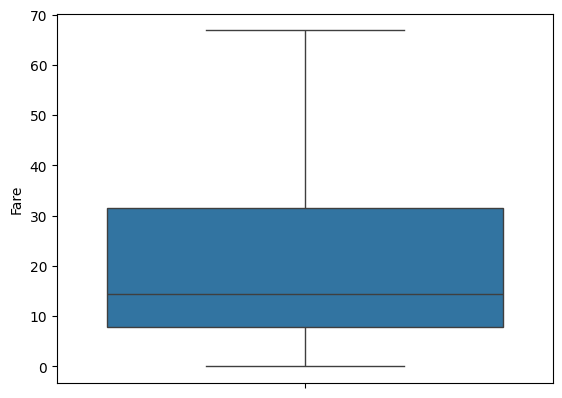

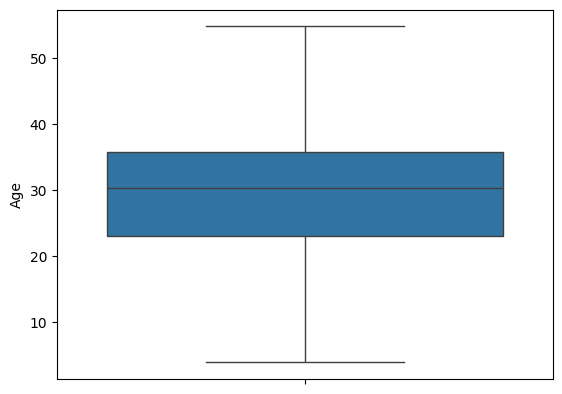

In [ ]:
for i in ['Fare','Age']:
  sns.boxplot(df[i])
  plt.show()

#Decision Tree

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
inputs= df.drop('Survived', axis='columns')
target= df['Survived']

In [ ]:
le_age= LabelEncoder()
le_gender= LabelEncoder()
le_FamilySize= LabelEncoder()
le_class= LabelEncoder()
le_fare= LabelEncoder()

In [ ]:
inputs['Age_n']= le_age.fit_transform(inputs['Age'])
inputs['Sex_n']=le_gender.fit_transform(inputs['Sex'])
inputs['FamilySize_n']=le_FamilySize.fit_transform(inputs['FamilySize'])
inputs['Pclass_n']=le_class.fit_transform(inputs['Pclass'])
inputs['Fare_n']=le_fare.fit_transform(inputs['Fare'])
inputs.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_n,Sex_n,FamilySize_n,Pclass_n,Fare_n
0,892.0,3.0,"Kelly, Mr. James",male,34.500,0.0,0.0,330911,7.8292,B57 B59 B63 B66,Q,1.0,38,1,0,2,24
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1.0,0.0,363272,7.0000,B57 B59 B63 B66,S,2.0,54,0,1,2,5
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,54.875,0.0,0.0,240276,9.6875,B57 B59 B63 B66,Q,1.0,61,1,0,1,41
3,895.0,3.0,"Wirz, Mr. Albert",male,27.000,0.0,0.0,315154,8.6625,B57 B59 B63 B66,S,1.0,27,1,0,2,34
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1.0,1.0,3101298,12.2875,B57 B59 B63 B66,S,3.0,20,0,2,2,46


In [ ]:
inputs_n=inputs.drop(['Age','FamilySize','Fare','Sex','Pclass','PassengerId','Name','SibSp','Parch','Ticket','Cabin',	'Embarked'],axis='columns')
inputs_n

,Age_n,Sex_n,FamilySize_n,Pclass_n,Fare_n
0,38,1,0,2,24
1,54,0,1,2,5
2,61,1,0,1,41
3,27,1,0,2,34
4,20,0,2,2,46
...,...,...,...,...,...
413,32,1,0,2,31
414,45,0,0,0,141
415,44,1,0,2,9
416,32,1,0,2,31


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, test_size=0.2, random_state=42)
model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("Training Accuracy:", model.score(X_train, y_train))
print("Testing Accuracy:", model.score(X_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [ ]:
s model.predict([[60,1,0,2,31]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0.])

In [ ]:
model.predict([[21,0,0,2,5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1.])